## Project: Unsupervised Learning - Clustering - AllLife Bank Credit Card Customer Segmentation

## Problem Defintion:  
AllLife Bank wants to focus on its credit card customer base in the next 
financial year. They have been advised by their marketing research team, that the 
penetration in the market can be improved. Based on this input, the Marketing team 
proposes to run personalised campaigns to target new customers as well as upsell to 
existing customers. Another insight from the market research was that the customers 
perceive the support services of the back poorly. Based on this, the Operations team 
wants to upgrade the service delivery model, to ensure that customers queries are 
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the 
Data Science team for help.

## Objective: 
To identify different segments in the existing customer based on their 
spending patterns as well as past interaction with the bank. 

## Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## Data Description:
* Data is of various customers of a bank with their credit limit, the total number of credit 
cards the customer has, and different channels through which customer has 
contacted the bank for any queries, different channels include visiting the bank, 
online and through a call centre.

### Data Dictionary

### Customer details:
 
###  Column:   Description        
---  ------               --------------  -----
 -   Sl_No:                 Row Number
 -   Customer Key:          Unique customer Key
 -   Avg_Credit_Limit:      Average Credit Limit on the Credit Cards
 -   Total_Credit_Cards:    Total number of Credit Cards owned by Customer
 -   Total_visits_bank:     Total visits to the Bank by Customer
 -   Total_visits_online:   Total online visits by Customer
 -   Total_calls_made:      Total Calls made by customer to the Bank


## `Learning Outcomes:`
- Exploratory Data Analysis
- Data Pre-processing
- Apply K-means Clustering algorithm. Use Elbow curve, Silhouette Score to figure out appropriate number of clusters". 
- Apply Hierarchical clustering with different linkage methods.Plot dendrograms for each linkage methods.Choose appropriate number of clusters. 
- Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insight.
- Insights & Recommendations


In [337]:
#################################################################################
# Project: Unsupervised Learning - Clustering -                                ##
# AllLife Bank Credit Card Customer Segmentation                               ##
# Submitted by "Bindu S Pillai"                                                ##
# AIML PG Program condcuted by University of Texas, Austin. Dated - 5/14/2021  ##
#################################################################################

# Importing necessary libraries for execution of the project.

import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from collections import Counter
from scipy.cluster.hierarchy import fcluster

In [338]:
#Loading the data from the excel file to a pandas DataFrame.
Data_file ="Credit Card Customer Data.xlsx"
bank_cust = pd.read_excel(Data_file,sheet_name='Sheet1')


In [339]:
# Displaying top 10 rows of file
bank_cust.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [340]:
# Data distribution and other metrics for different features
bank_cust.describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500,190.670,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.444,25627.772,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242,37625.488,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706,2.168,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403,1.632,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606,2.936,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583,2.865,0.0,1.00,3.0,5.00,10.0


In [341]:
#Information on the columns or features such as anmes,data types etc.
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [342]:
print("Missing values in each column")
bank_cust.isnull().sum()

Missing values in each column


Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [343]:
print("Number of unique values in each column")
bank_cust.nunique()

Number of unique values in each column


Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [344]:
#Size of the data, no. of rowws and  columns
bank_cust.shape

(660, 7)

In [345]:
## Dropping Sl_No as its only the row number, also dropping Customer Key as it is only customer identification field. 
## Copying to new dataframe "bank__cc_cust". So original datframe, "bank_cust" is intact.

bank_cc_cust=bank_cust.drop("Sl_No", axis =1)

In [346]:
bank_cc_cust=bank_cc_cust.drop("Customer Key", axis =1)

In [347]:
# Data distribution and other metrics for different features
bank_cc_cust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations-**   

* Bank has provided average credit limit from 3k to 200K. Average 34.5K , mode only 18K. 75% is 48K. There are outliers.
* Total credit cards range from 1 to 6, median is 2.
* Total bank visits range from 0 to 5, median is 2.
* Total online visits range from 0 to 15, median is 2. 75% is 4, looks like there are outliers
* Total calls made range from 0 to 10, median is 3.

In [348]:
bank_cc_cust.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## EDA

## Univariate Analysis Boxplot and Histogram

In [349]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

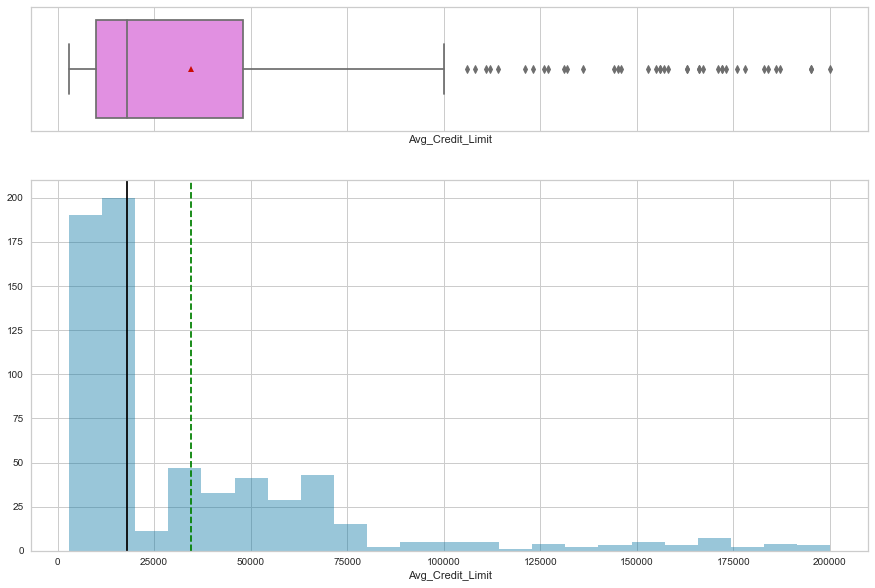

In [350]:
## Observations on Avg_Credit_Limit
histogram_boxplot(bank_cc_cust["Avg_Credit_Limit"])

### Observations

- Average Credit limit is highly right skewed with many outliers. Average value for this variable is higher than mode, indicating most customers have  below average value for average credit limit

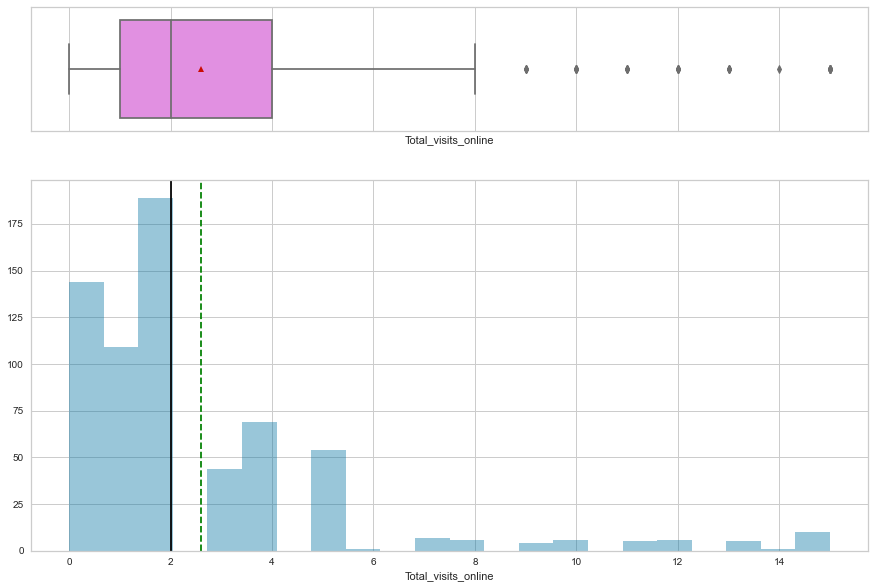

In [351]:
## Observations on Avg_Credit_Limit
histogram_boxplot(bank_cc_cust["Total_visits_online"])

### Observations

- Total Visits online has some outliers

## Univariate Analysis - Count Plot

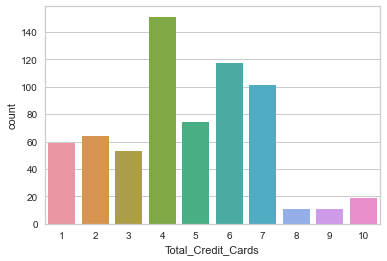

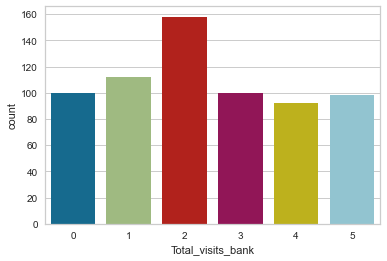

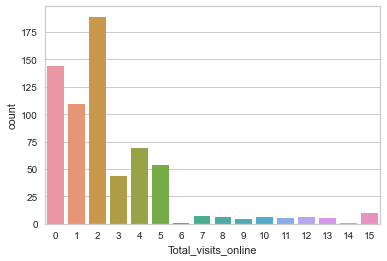

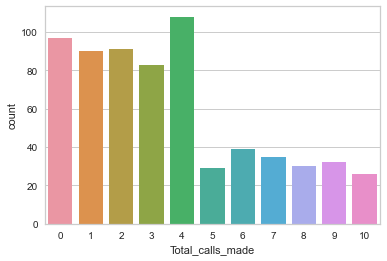

In [352]:
for i in bank_cc_cust.columns:
    if i != 'Avg_Credit_Limit':
        sns.countplot(x=i,data=bank_cc_cust)
        plt.show()

In [353]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on Total_Credit_Cards

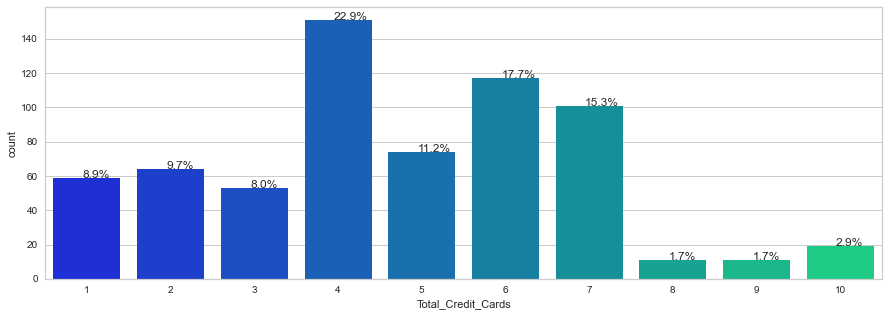

In [354]:
#Plot barplot on Total_Credit_Cards by using sns count plot and calling the above function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_cc_cust["Total_Credit_Cards"],palette='winter')
perc_on_bar(ax,bank_cc_cust["Total_Credit_Cards"])

### Insights
* 22.9% of the customers have 4 credit cards. 8.9% have only 1. 2.9% have 10. Majority of customers have 4-7 credit card

## Observations on Total_visits_bank

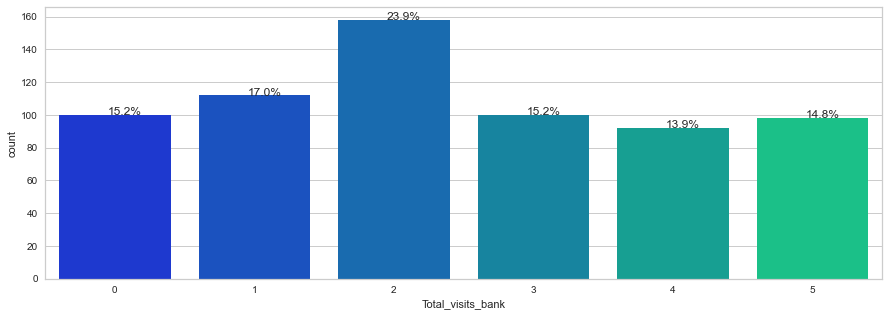

In [355]:
#Plot barplot on Total_Credit_Cards by using sns count plot and calling the above function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_cc_cust["Total_visits_bank"],palette='winter')
perc_on_bar(ax,bank_cc_cust["Total_visits_bank"])

### Insights
* 23.9% of the customers had visited bank twice. 14.8% visited 5 times. 15.2% have never visited. Looks like an almost uniform distribution in this case.

## Observations on Total_visits_online

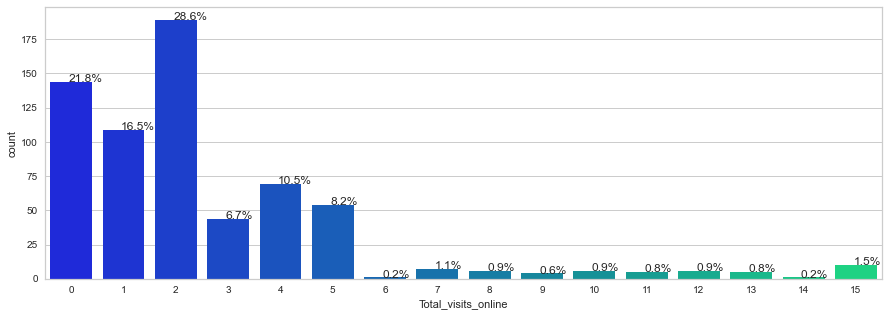

In [356]:
#Plot barplot on Total_Credit_Cards by using sns count plot and calling the above function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_cc_cust["Total_visits_online"],palette='winter')
perc_on_bar(ax,bank_cc_cust["Total_visits_online"])

### Insights
* 28.6% of the customers have visited online twice. 1.5% visited 15 times. Most customers have visited less than or equal to 5 times. 21.8% never visted online. Looks like a right skewed distribution in this case.

## Observations on Total_calls_made

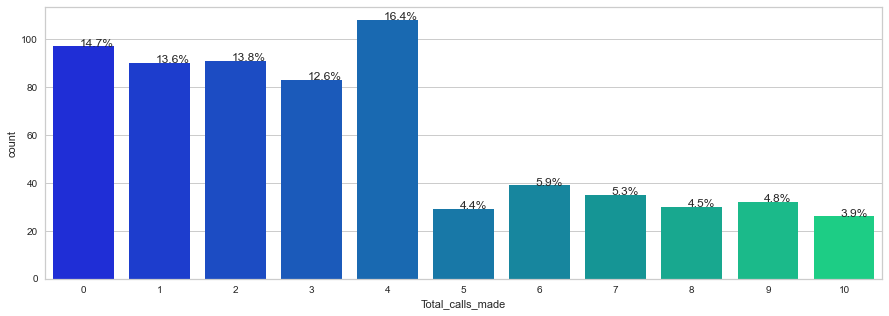

In [357]:
#Plot barplot on Total_Credit_Cards by using sns count plot and calling the above function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_cc_cust["Total_calls_made"],palette='winter')
perc_on_bar(ax,bank_cc_cust["Total_calls_made"])

### Insights
* 16.4% of the customers made 4 calls. 3.9% made 10 calls. Most customers have made less than or equal to 4 calls. 14.7% never called. 

## Bivariate Analysis

## Pair Plot to show the relation between features. 
## Diagonal of the Pair Plot will show the kernal density estimate (shape of data distribution) for a variable.

 ### Kde can indicate how many gaussians are in the data distribution which may represent the number of customer segments

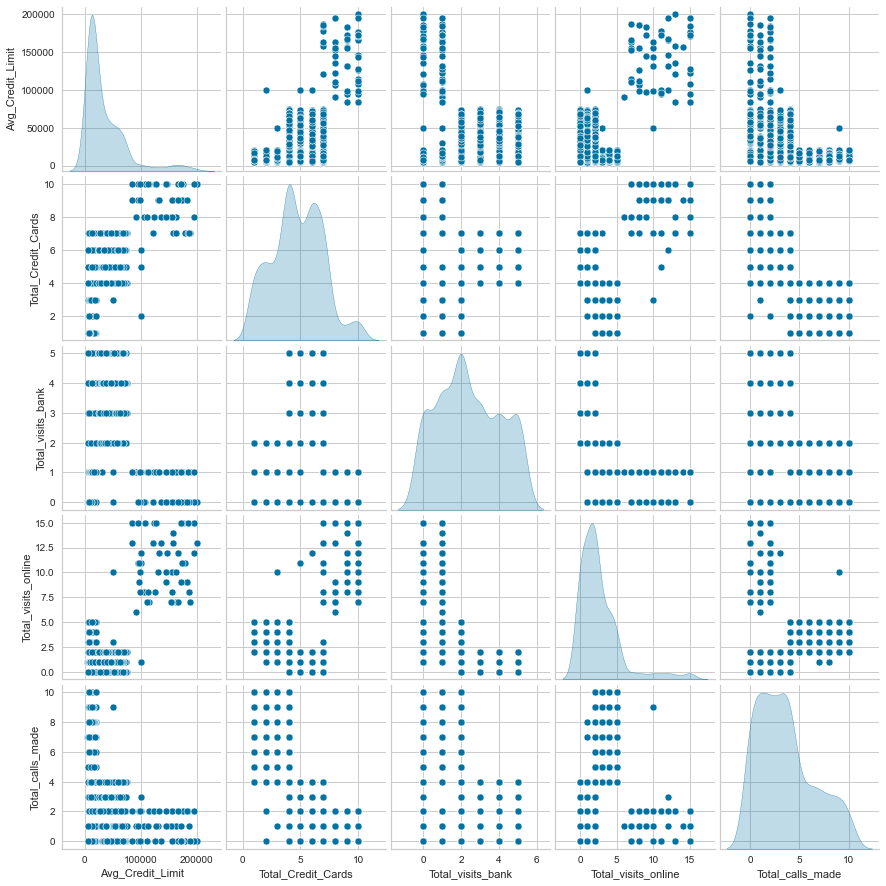

In [358]:
plot=sns.pairplot(bank_cc_cust , diag_kind = 'kde')
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
#    ax.set_xlabel(l, fontsize=18)
    m = ax.get_ylabel()
#    ax.set_ylabel(m, fontsize=18)
plt.show()

### Insights
* There seems to be no linear relation between most features except some positive relation between Avg_Credit_Limit and Total_Credit_cards, Avg_Credit_Limit and Total_visits_online as well as may be some between Total_visits_online and Total_Credit_cards.
* The kernal density plots show multiple gaussians for Total_Credit_cards, Total_visits_bank, Total_calls_made and Avg_Credit_Limit

## Heatmap of correlation between different numerical features.

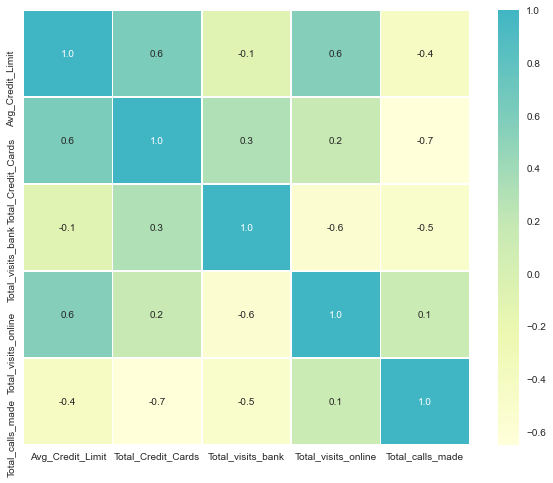

In [359]:
# heatmap of correlation between different numerical features.
# Darker the color higher the correlation
plt.figure(figsize=(10,8))
sns.heatmap(bank_cc_cust.corr(), annot=True, cmap="YlGnBu",linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Insights
* The heatmap is actually showing some positive correlation between Avg_Credit_Limit and Total_Credit_cards as well as Avg_Credit_Limit and Total_visits_bank
* There is negative correlation between Total_Credit_cards and Total_calls_made as well as Total_visits_online and Total_visits_bank

## Illustrate the insights based on EDA

   ####     The insights based on EDA are given throughout the EDA section above.



## Data Pre-processing


**Prepare the data for analysis - Missing value Treatment, Outlier Detection, Feature Engineering, Duplicate observations check and removal if found**

**Below many steps are preparing data and cleaning up, Outlier treatment etc.**

### Identify Missing Values and treat if found

In [360]:
#Listing columns
bank_cc_cust.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [361]:
#Checking for Nulls
print("Missing values in each column")
bank_cc_cust.isnull().sum()

Missing values in each column


Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [362]:
#checking unique values
bank_cc_cust["Total_Credit_Cards"].unique()

array([ 2,  3,  7,  5,  6,  4,  1,  9,  8, 10], dtype=int64)

In [363]:
#checking unique values
bank_cc_cust["Total_visits_bank"].unique()

array([1, 0, 2, 5, 3, 4], dtype=int64)

In [364]:
#checking unique values
bank_cc_cust["Total_visits_online"].unique()

array([ 1, 10,  3, 12, 11,  2,  5,  4,  0, 14,  7, 13, 15,  6,  8,  9],
      dtype=int64)

In [365]:
#checking unique values
bank_cc_cust["Total_calls_made"].unique()

array([ 0,  9,  4,  3,  8,  2,  1,  7,  5,  6, 10], dtype=int64)

#### Insights:
- No missing Values, nulls or odd values are found
- So no treatment is needed.

### Identify duplicates and drop if found

In [366]:
#Duplicated
df=bank_cc_cust.duplicated()
df.sum()

11

In [367]:
#Size of data before dropping duplicates
bank_cc_cust.shape

(660, 5)

In [368]:
#Dropping duplicates
bank_cc_cust= bank_cc_cust.drop_duplicates()

In [369]:
# Checking to make sure if Duplicates are removed 
df=bank_cc_cust.duplicated()
df.sum()

0

In [370]:
#Size of data after dropping duplicates
bank_cc_cust.shape

(649, 5)

#### Insights:
- There were 11 duplicates
- they were dropped.

### Outlier Treatment

In [371]:
#Making a copy of the dataframe
bank_data = bank_cc_cust.copy()

In [372]:
bank_data.skew()

Avg_Credit_Limit       2.186592
Total_Credit_Cards     0.150120
Total_visits_bank      0.149368
Total_visits_online    2.209521
Total_calls_made       0.656954
dtype: float64

### Using log function to treat outliers for 2 highly skewed features

In [373]:
# Log transformation of a skewed field (with outliers) using numpy log function
bank_data['Avg_Credit_Limit'] = np.log(bank_data['Avg_Credit_Limit'])

In [374]:
#Checking values after applying log function
bank_data['Avg_Credit_Limit']

0      11.512925
1      10.819778
2      10.819778
3      10.308953
4      11.512925
         ...    
655    11.502875
656    11.338572
657    11.884489
658    12.055250
659    12.025749
Name: Avg_Credit_Limit, Length: 649, dtype: float64

In [375]:
#Checking values in the original datset to see the original values before applying log function
bank_cc_cust['Avg_Credit_Limit']

0      100000
1       50000
2       50000
3       30000
4      100000
        ...  
655     99000
656     84000
657    145000
658    172000
659    167000
Name: Avg_Credit_Limit, Length: 649, dtype: int64

In [376]:
# Log transformation of a skewed field (with outliers) using numpy log function
bank_data['Total_visits_online'] = np.log(bank_data['Avg_Credit_Limit'])

In [377]:
#Checking values after applying log function
bank_data['Total_visits_online']

0      2.443470
1      2.381376
2      2.381376
3      2.333013
4      2.443470
         ...   
655    2.442597
656    2.428210
657    2.475234
658    2.489500
659    2.487050
Name: Total_visits_online, Length: 649, dtype: float64

In [378]:
#Checking values in the original datset to see the original values before applying log function
bank_cc_cust['Total_visits_online']

0       1
1      10
2       3
3       1
4      12
       ..
655    10
656    13
657     9
658    15
659    12
Name: Total_visits_online, Length: 649, dtype: int64

### Apply zscore to standardize data

In [379]:
#Apply standardization to both original and outlier-treated  data.
bank_data_sd = bank_data.apply(zscore)
bank_cc_data_sd = bank_cc_cust.apply(zscore)

In [380]:
#Checking top 10 rows of stndardized dataset.
bank_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,11.512925,2,1,2.443470,0
1,10.819778,3,0,2.381376,9
2,10.819778,7,1,2.381376,4
3,10.308953,5,1,2.333013,4
4,11.512925,6,0,2.443470,3


## Customer Segmentation

## Applying K-means clustering algorithms


## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Wall time: 0 ns
Number of Clusters: 1 	Average Distortion: 2.1130980242190023
Number of Clusters: 2 	Average Distortion: 1.5116927659909714
Number of Clusters: 3 	Average Distortion: 1.2492879355842816
Number of Clusters: 4 	Average Distortion: 1.0965946791216508
Number of Clusters: 5 	Average Distortion: 1.0378632431329902
Number of Clusters: 6 	Average Distortion: 0.9832649366576831
Number of Clusters: 7 	Average Distortion: 0.9391312213939684
Number of Clusters: 8 	Average Distortion: 0.901569176589822


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

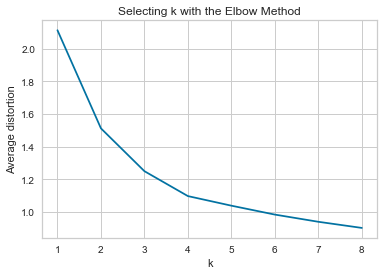

In [381]:
#Finding optimal no. of clusters(K) for K Means algorithm by calculating distortions for each value.
#Then plot the elbow diagram to identify the right value of clusters.
%time
from scipy.spatial.distance import cdist
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(bank_data_sd)
    prediction=model.predict(bank_data_sd)
    distortion=sum(np.min(cdist(bank_data_sd, model.cluster_centers_, 'euclidean'), axis=1)) / bank_data_sd.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Though the bend is not coming out clearly as there are many bends, let us look at 4 clusters and 5 clusters

For n_clusters = 2, silhouette score is 0.40968140163969213)
For n_clusters = 3, silhouette score is 0.39628672275395166)
For n_clusters = 4, silhouette score is 0.42175960136744406)
For n_clusters = 5, silhouette score is 0.3670839529867925)
For n_clusters = 6, silhouette score is 0.28152498743883336)
For n_clusters = 7, silhouette score is 0.26941401038080026)
For n_clusters = 8, silhouette score is 0.27150916774129163)
For n_clusters = 9, silhouette score is 0.26849535965886034)


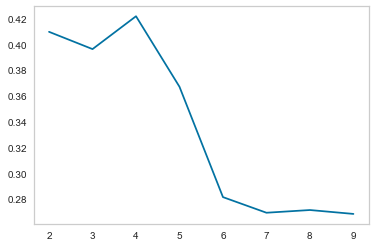

In [382]:
# let's also look into the Silhouette scores for the different number of clusters for K Means and plot it.
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((bank_data_sd))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(bank_data_sd, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

**Silhouette score for 4 is high at 0.42, so we can choose 4 as value of k.**

### Let's also build KMeans model using the standardized data from original data that was not treated for outliers.

Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9877896646529043
Number of Clusters: 6 	Average Distortion: 0.9402502578440572
Number of Clusters: 7 	Average Distortion: 0.9072780110692937
Number of Clusters: 8 	Average Distortion: 0.8866501706447956


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

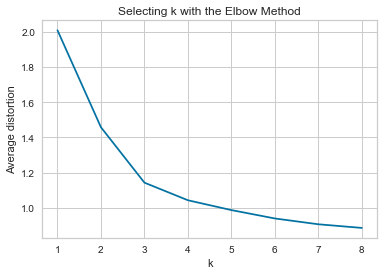

In [383]:
#Finding optimal no. of clusters(K) for K Means algorithm by calculating distortions for each value.
#Then plot the elbow diagram to identify the right value of clusters.

from scipy.spatial.distance import cdist
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(bank_cc_data_sd)
    prediction=model.predict(bank_cc_data_sd)
    distortion=sum(np.min(cdist(bank_cc_data_sd, model.cluster_centers_, 'euclidean'), axis=1)) / bank_cc_data_sd.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 4 clusters

For n_clusters = 2, silhouette score is 0.41800025566689647)
For n_clusters = 3, silhouette score is 0.516281010855363)
For n_clusters = 4, silhouette score is 0.3570238219413198)
For n_clusters = 5, silhouette score is 0.2724770023074787)
For n_clusters = 6, silhouette score is 0.25657401018799436)
For n_clusters = 7, silhouette score is 0.24850772311914635)
For n_clusters = 8, silhouette score is 0.22599570972997055)
For n_clusters = 9, silhouette score is 0.22721945090756407)


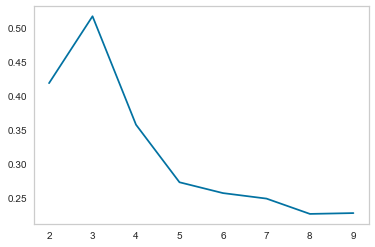

In [384]:
# let's also look into the Silhouette scores for the different number of clusters for K Means and plot it.
# This time using the standardized data from original data that was not treated for outliers
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((bank_cc_data_sd))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(bank_cc_data_sd, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

**Silhouette score even higher with untreated outliers for 3 clusters at  0.51, so we will choose 3 as value of k. We will also use standardized data using data that was not treated for outliers for further segmentation. I believe z Score Standardization itself takes care of some of the issues with outliers**

In [385]:
#Importing necessary modules. Installed yellowbrick, Commented out the code to avoid installing again.
##!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

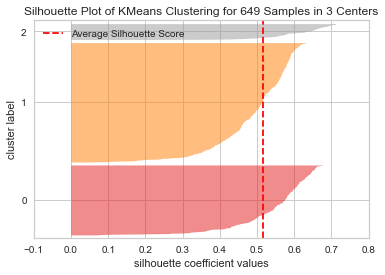

In [386]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(bank_cc_data_sd)    
visualizer.show();

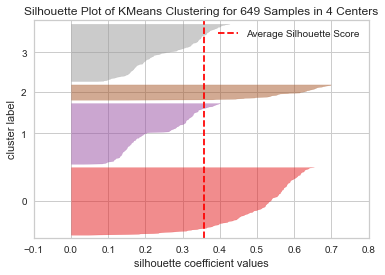

In [387]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(bank_cc_data_sd)    
visualizer.show();

**Silhouette score is higher at 0.51 for 3 clusters as opposed to 0.35 for 4 and 0.41 for 2, so we will choose 3 as value of k. data distribution is not entirely uniform  for both 3 and 4 clusters.**

In [388]:
# lets us take 3 as number of clusters and build final KMeans model
%time
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(bank_cc_data_sd)

Wall time: 0 ns


KMeans(n_clusters=3, random_state=0)

In [389]:
# Making copies of both original and standardized dataframes
bank_data_km = bank_cc_cust.copy()
df_sd = bank_cc_data_sd.copy()

In [390]:
# Adding segment labels generated by K Means to the dataset.
bank_data_km['K_means_segments'] = kmeans.labels_
bank_cc_data_sd['K_means_segments'] = kmeans.labels_

In [391]:
# Displaying first 5 rows showing segment labels.
bank_data_km.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,100000,2,1,1,0,1
1,50000,3,0,10,9,2
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,0


In [392]:
# Calculating average and count for each cluster or customer segment
kmcluster_profile = bank_data_km.groupby('K_means_segments').mean()
kmcluster_profile['count_in_each_segments'] = bank_data_km.groupby('K_means_segments')['Total_visits_online'].count().values

In [393]:
# lets display cluster profile showing cluster averages for each numeric feature. Max values are highlighted in green
kmcluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


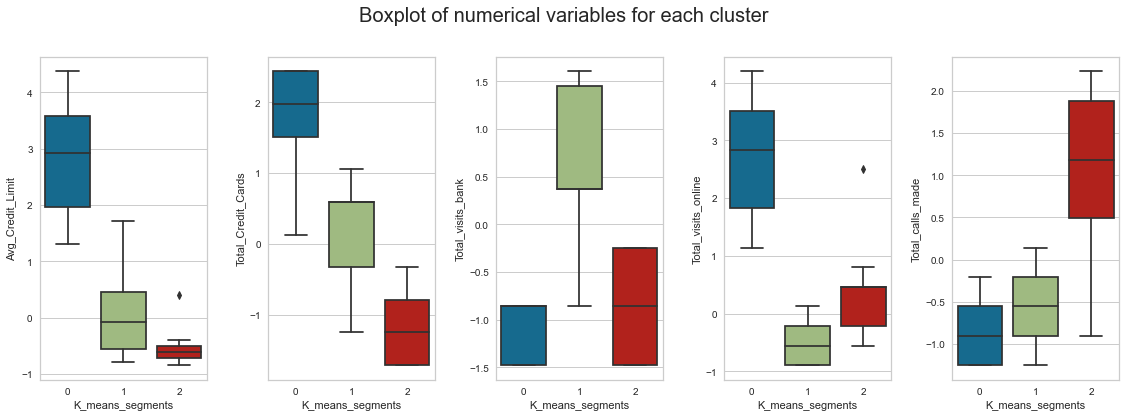

In [394]:
## Showing data distribution for all numerical variables for different segments in box plot. This is showing scaled data.
all_col = bank_cc_cust.columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=bank_cc_data_sd[all_col[counter]],x=bank_cc_data_sd['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

In [395]:
# Merging the dataset with segment labels with original dataset having customer keys 
# so  we can see which cutomer is in which segment.
bank_cc_cust_merge=bank_cust.merge(bank_data_km, how='inner', on=None, left_index=True, 
                                right_index=True, sort=False) 
                                

In [396]:
# Showing merged dataset
bank_cc_cust_merge.head()

,Sl_No,Customer Key,Avg_Credit_Limit_x,Total_Credit_Cards_x,Total_visits_bank_x,Total_visits_online_x,Total_calls_made_x,Avg_Credit_Limit_y,Total_Credit_Cards_y,Total_visits_bank_y,Total_visits_online_y,Total_calls_made_y,K_means_segments
0,1,87073,100000,2,1,1,0,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,100000,6,0,12,3,0


In [397]:
## Remove duplicate column 
bank_data_segments = bank_cc_cust_merge.drop(['Avg_Credit_Limit_y', 'Total_Credit_Cards_y','Total_visits_bank_y',
                                            'Total_visits_online_y', 'Total_calls_made_y'], axis = 1)

In [398]:
bank_data_segments.shape

(649, 8)

In [399]:
#Rename suffixed column names by merge command back to original names and displaying fifnal result.
bank_data_segments.columns=bank_data_segments.columns.str.replace('_x','')
bank_data_segments.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,0
5,6,58634,20000,3,0,1,8,2
6,7,48370,100000,5,0,11,2,0
7,8,37376,15000,3,0,1,1,2
8,9,82490,5000,2,0,2,2,2
9,10,44770,3000,4,0,1,7,2


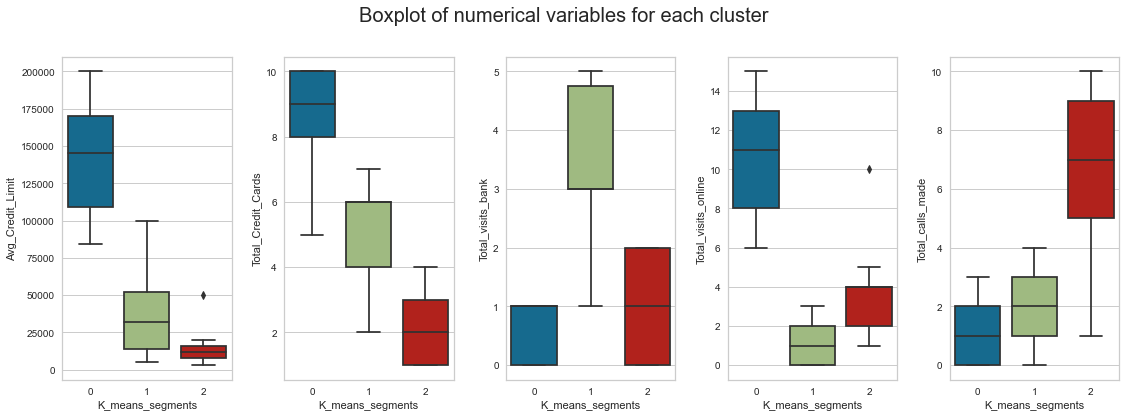

In [400]:
# Plotting Box plot with original values for variables as opposed to scaled values.
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=bank_data_segments[all_col[counter]],x=bank_data_segments['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights from K Means Customer Segments

- **Cluster 0**:
    - This cluster contains customers with Avg_Credit_Limit less than 25K.Median is 13K meaning 50% of customers in this group have 13K or less average credit limit. This is the customers with lowest credit limit
    - Total Credit cards 4 or less, majority 3 or less. Median 2.
    - Total_visits_bank less than or equal to 2. median for Total_visits_bank is 1.
    - Total_visits_online between 1 and 5, Median 4 visits online
    - Customers in this group made the most calls of all groups between 2-10. Median 7. This might mean they faced most problems.
    - There are 218 in this group out of total 649 customers.  
    
- **Cluster 1**:
     - This cluster contains customers with Avg_Credit_Limit between 0 and 100K. Median is 35K meaning 50% of customers in this group have 35K or less average credit limit. This is the group of customers with second lowest credit limit
    - Total Credit cards 2 to 7, majority 6 or less. Median 4.
    - Total_visits_bank ranges to the full extent, 0 to 5. median for Total_visits_bank is 3. 
    - Total_visits_online between 0 and 3. Median 1 visit online
    - Total_calls_made of ranges between 0 - 4. Median 2.
    - There are 381 in this group out of total 649 customers.   

- **Cluster 2**:
    - This group has the highest Avg_Credit_Limit values. It ranges from 80K to 200K. Median 140K  
    - It also has people with highest number of credit cards,5-10. Median 9.
    - Total_visits_bank is the lowest from 0-1. median for Total_visits_bank is 0.
    - Total_visits_online highest between 6 to 15. Median being 11.
    - Total_calls_made of ranges between 0 - 3. Median 1.
    - There are 50 in this group out of total 649 customers.   

## Customer Segmentation

## Applying Hierarchical clustering algorithms


In [401]:
#Build Hierarchical Model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [402]:
# Fit the model using scaled data
model.fit(df_sd)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [403]:
# Make a copy of original data to add segment labels.
bank_data_hier = bank_cc_cust.copy()

In [404]:
# Adding segment labels generated by Agglomerative clustering to the dataset.Dispalying top 10 rows.
bank_data_hier['labels'] = model.labels_
bank_data_hier.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [405]:
#group by segments
bankDataClust = bank_data_hier.groupby(['labels'])

In [406]:
#Calculating mean for different variables within clusters
bankDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,34000.000000,5.514512,3.480211,0.984169,1.997361
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12263.636364,2.404545,0.940909,3.568182,6.904545


## Applying Different Linkage methods, drawing dendrograms, calculating cophenetic coefficient to determine the optimum parameters for Hierarchical Clustering.


In [407]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
#Applying different Linkage parameters

Z = linkage(df_sd,
            method = 'ward',
            metric = 'euclidean')
c, coph_dists = cophenet(Z , pdist(df_sd))

c

0.7425813590948763

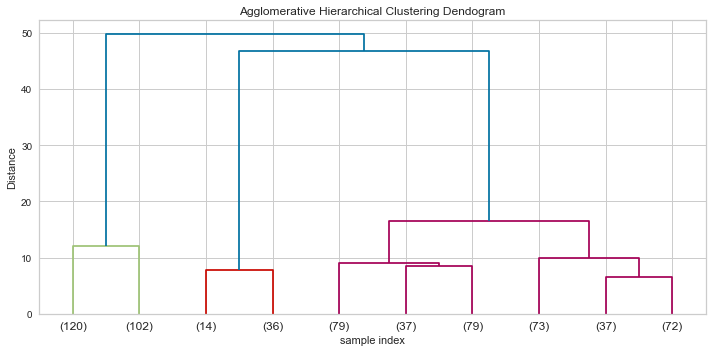

In [408]:
#Drawing dendrogram for above combination of Linkage parameters, 
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,
)
plt.tight_layout()
plt.show()

In [409]:
#Using different Linkage parameters
Z = linkage(df_sd, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_sd))

c

0.8794736468795109

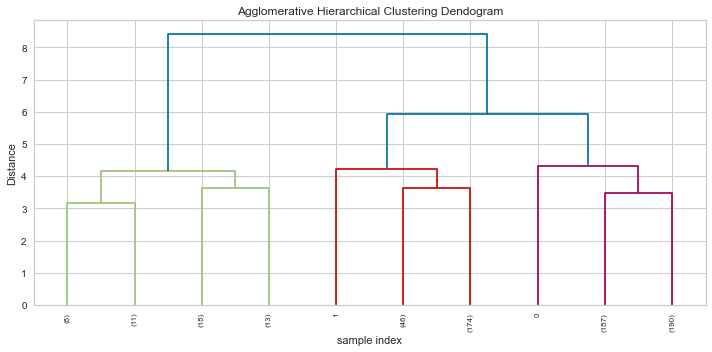

In [410]:
#Drawing dendrogram for above combination of Linkage parameters,
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., truncate_mode='lastp', p=10, leaf_font_size=8. )
plt.tight_layout()

In [411]:
#Using different Linkage parameters
Z = linkage(df_sd, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_sd))

c

0.8974425535306298

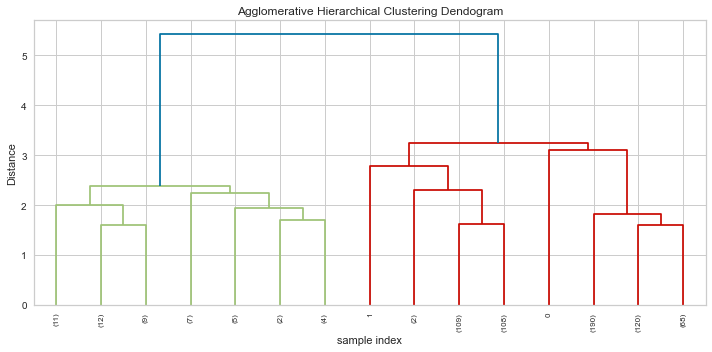

In [412]:
#Drawing dendrogram for above combination of Linkage parameters,
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., truncate_mode='lastp', p=15, leaf_font_size=8. )
plt.tight_layout()

In [413]:
#More comprehensive comparison of different linkage parameters in terms of cophenetic coefficient
methods = ['single', 'complete', 'average', 'ward', 'centroid']
metrics = ['euclidean', 'mahalanobis', 'chebyshev']

cophenet_df = pd.DataFrame(index=methods, columns=metrics)

for method in methods:
    for metric in metrics:
        try:
            Z = linkage(df_sd,
                method = method,
                metric=metric)
            distance_between_pair_of_points = pdist(df_sd)
            cophenet_Z = cophenet(Z)
            cophenet_correlation = pearsonr(cophenet(Z), distance_between_pair_of_points)[0]
            cophenet_df.loc[method, metric] = cophenet_correlation
        except:
            pass

In [414]:
cophenet_df

,euclidean,mahalanobis,chebyshev
single,0.739514,0.705475,0.737911
complete,0.879474,0.651337,0.857862
average,0.897443,0.833029,0.896037
ward,0.742581,NaN,NaN
centroid,0.894471,NaN,NaN


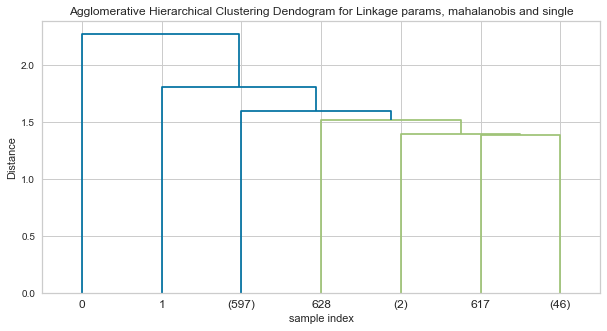

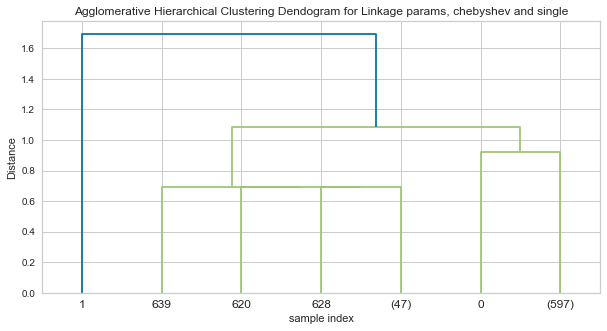

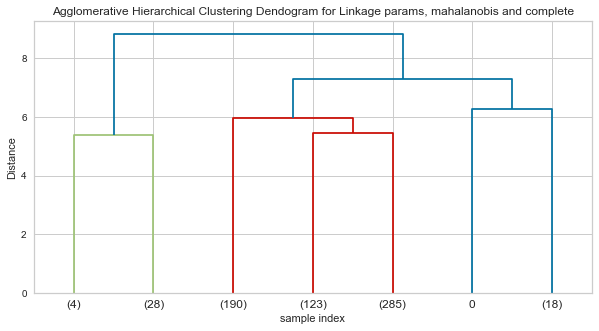

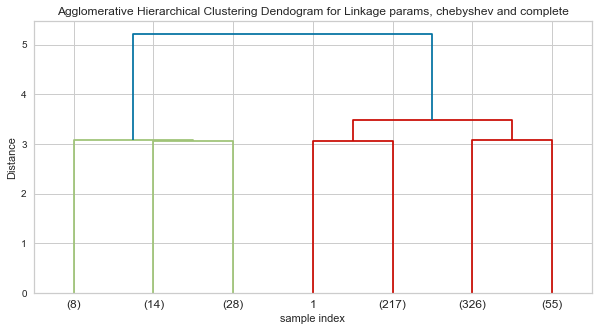

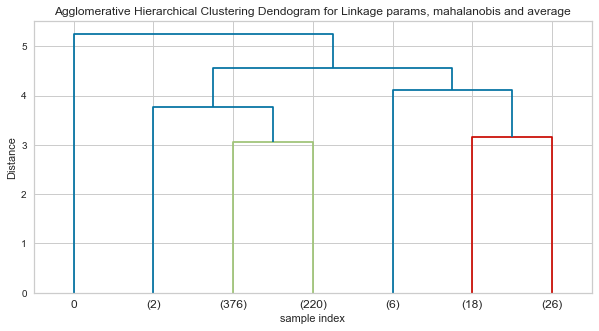

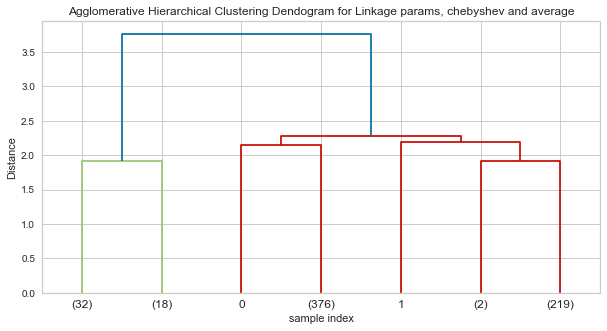

In [415]:
#Drawing dendrogram for rest of linkage parameters
methods = ['single', 'complete', 'average', 'ward', 'centroid']
metrics = [ 'mahalanobis', 'chebyshev']

for method in methods:
    for metric in metrics:
        try:
            Z = linkage(df_sd,
                method = method,
                metric=metric)
            #Drawing dendrogram for above combination of Linkage parameters,
            plt.figure(figsize=(10, 5))
            plt.title(f"Agglomerative Hierarchical Clustering Dendogram for Linkage params, {metric} and {method}")
            plt.xlabel('sample index')
            plt.ylabel('Distance')
            dendrogram(
                      Z,
                  truncate_mode='lastp',  # show only the last p merged clusters
                     p=7,
                    )
            plt.show()
        except:
            pass

### Insights
- Eculidean and average seems to be the best linkage parameters by looking at the cophenetic index. It has 0.89 followed by euclidean and complete at 0.87.

In [416]:
# Building model using selected Linkage parameters for max Copenetic score.
ac_cluster = AgglomerativeClustering(n_clusters=2,
                                    linkage='average',
                                    affinity='euclidean'
                                    )
cluster_labels = ac_cluster.fit_predict(df_sd)

In [417]:
# Number of data points in each cluster
Counter(cluster_labels)

Counter({0: 599, 1: 50})

- Not uniformly distributed. let's look at different values for number of clusters and compare Silhouette score.

In [418]:
for i in range(2,10):
    ac_cluster = AgglomerativeClustering(n_clusters=i,
                                    linkage='average',
                                    affinity='euclidean')
    cluster_labels = ac_cluster.fit_predict(df_sd)
    silhouette_avg = silhouette_score(df_sd, cluster_labels)
    print(f"cluster size: {i} : {silhouette_avg}")

cluster size: 2 : 0.5690653901733652
cluster size: 3 : 0.5164769161012985
cluster size: 4 : 0.47541352027335854
cluster size: 5 : 0.4402145951649966
cluster size: 6 : 0.4191811788239719
cluster size: 7 : 0.3457105302098707
cluster size: 8 : 0.3436755082302095
cluster size: 9 : 0.34567925143858613


In [419]:
# BUilding final model using selected parameters for optimum Silhouette score and data distribution 
%time
ac_cluster = AgglomerativeClustering(n_clusters=3,
                                    linkage='average',
                                    affinity='euclidean'
                                    )
cluster_labels = ac_cluster.fit_predict(df_sd)
Counter(cluster_labels)

Wall time: 0 ns


Counter({0: 379, 2: 220, 1: 50})

## Insights
- Even though 2 clusters have highest Sihouette score, the data distribution is not at all uniform among the 2 groups.
- 3 clusters data distribution is better, so picking 3 clusters as the final model.

In [420]:
#Making copies of original and scaled datasets
bank_data_hier = bank_cc_cust.copy()
df_hier_sd = df_sd.copy()

In [421]:
# Adding Cluster labels for Agglomerative clustering to the datasets
bank_data_hier['Agglo_segments'] = cluster_labels
df_hier_sd['Agglo_segments'] = cluster_labels

In [422]:
# Displaying first 5 rows showing segment labels.
bank_data_hier.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Agglo_segments
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


In [423]:
# Calculating average and count for each cluster or customer segment
agcluster_profile = bank_data_hier.groupby('Agglo_segments').mean()
agcluster_profile['count_in_each_segments'] = bank_data_hier.groupby('Agglo_segments')['Total_visits_online'].count().values

In [424]:
# lets display cluster profile showing cluster averages for each numeric feature. Max values are highlighted in green
agcluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
Agglo_segments,,,,,,
0,34000.000000,5.514512,3.480211,0.984169,1.997361,379
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12263.636364,2.404545,0.940909,3.568182,6.904545,220


In [425]:
# Merging the dataset with segment labels with original dataset having customer keys 
# so  we can see which cutomer is in which segment.
bank_data_merge=bank_cust.merge(bank_data_hier, how='inner', on=None, left_index=True, 
                                right_index=True, sort=False) 

In [426]:
# Showing merged dataset
bank_data_merge.head()

,Sl_No,Customer Key,Avg_Credit_Limit_x,Total_Credit_Cards_x,Total_visits_bank_x,Total_visits_online_x,Total_calls_made_x,Avg_Credit_Limit_y,Total_Credit_Cards_y,Total_visits_bank_y,Total_visits_online_y,Total_calls_made_y,Agglo_segments
0,1,87073,100000,2,1,1,0,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,100000,6,0,12,3,1


In [427]:
## Remove duplicate columns 
bank_agg_segments = bank_data_merge.drop(['Avg_Credit_Limit_y', 'Total_Credit_Cards_y','Total_visits_bank_y',
                                            'Total_visits_online_y', 'Total_calls_made_y'], axis = 1)

In [428]:
#Verifying number of rows.
bank_agg_segments.shape

(649, 8)

In [429]:
#Rename suffixed column names by merge command back to original names and displaying fifnal result.
bank_agg_segments.columns=bank_agg_segments.columns.str.replace('_x','')
bank_agg_segments.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Agglo_segments
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1
5,6,58634,20000,3,0,1,8,2
6,7,48370,100000,5,0,11,2,1
7,8,37376,15000,3,0,1,1,2
8,9,82490,5000,2,0,2,2,2
9,10,44770,3000,4,0,1,7,2


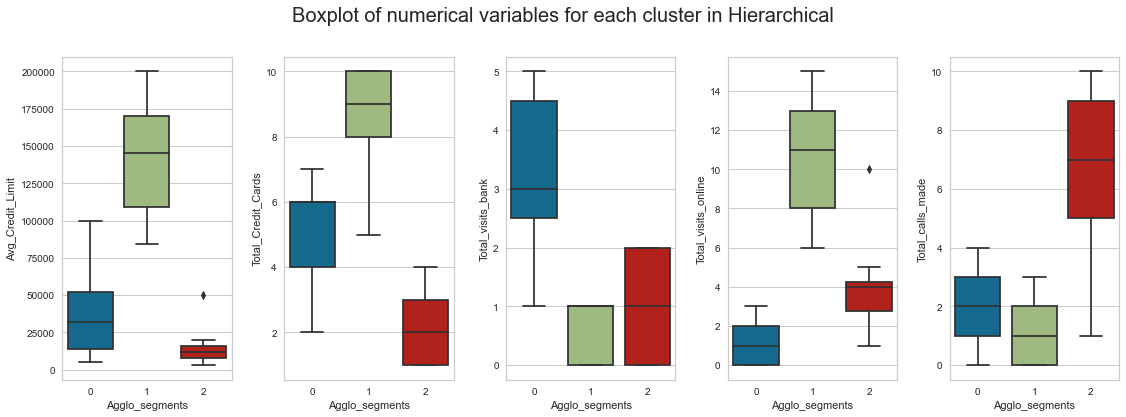

In [430]:
## Showing data distribution for all numerical variables for different segments in box plot.
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster in Hierarchical', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=bank_agg_segments[all_col[counter]],x=bank_agg_segments['Agglo_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights from Agglomerative(Hierarchical) Customer Segments

- **Cluster 0**:
   - This cluster contains customers with Avg_Credit_Limit between 0 and 100K. Median is 35K meaning 50% of customers in this group have 35K or less average credit limit. This is the group of customers with second lowest credit limit
    - Total Credit cards 2 to 7, majority 6 or less. Median 4.
    - Total_visits_bank ranges to the full extent, 0 to 5. median for Total_visits_bank is 3. 
    - Total_visits_online between 0 and 3. Median 1 visit online
    - Total_calls_made of ranges between 0 - 4. Median 2.
    - There are 379 in this group out of total 649 customers.   
    
- **Cluster 1**:
  - This group has the highest Avg_Credit_Limit values. It ranges from 80K to 200K. Median 140K  
    - It also has people with highest number of credit cards,5-10. Median 9.
    - Total_visits_bank is the lowest from 0-1. median for Total_visits_bank is 0.
    - Total_visits_online highest between 6 to 15. Median being 11.
    - Total_calls_made of ranges between 0 - 3. Median 1.
    - There are 50 in this group out of total 649 customers.  
  
- **Cluster 2**:
  - This cluster contains customers with Avg_Credit_Limit less than 25K.Median is 13K meaning 50% of customers in this group have 13K or less average credit limit. This is the customers with lowest credit limit
    - Total Credit cards 4 or less, majority 3 or less. Median 2.
    - Total_visits_bank less than or equal to 2. median for Total_visits_bank is 1.
    - Total_visits_online between 1 and 5, Median 4 visits online
    - Customers in this group made the most calls of all groups between 2-10. Median 7. This might mean they faced most problems.
    - There are 220 in this group out of total 649 customers.  
     

## Customer Segmentation

## Comaprison between K-means and Hierarchical clustering algorithms


### Comparison between Silhouette scores

#### Top 3 Silhouette scores for K means with different number of clusters. We are picking 3 for final model.
- For n_clusters = 2, silhouette score is 0.41800025566689647)
- For n_clusters = 3, silhouette score is 0.516281010855363)
- For n_clusters = 4, silhouette score is 0.3570238219413198)

#### Top 3 Silhouette scores for Agglomerative  with different number of clusters. We are picking 3 for final model. 
- cluster size: 2 : 0.5690653901733652
- cluster size: 3 : 0.5164769161012985
- cluster size: 4 : 0.47541352027335854

#### The score looks highest for 2 clusters , but the distribution of data over the 2 clusters is very non-uniform as shown below.  3 is somewhat better. So we picked 3 over 2.
**Distribution of data for 2 clusters - ({0: 599, 1: 50})**

**Distribution of data for 3 clusters - ({0: 379, 2: 220, 1: 50})**

#### Silhouette score for Agglomerative is slighlty higher, 0.5165 over K means, 0.5163

### Comparison between cluster profiles

In [431]:
# lets display cluster profile for KMeans
kmcluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


In [432]:
# lets display cluster profile for Hierarchical Clustering
agcluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
Agglo_segments,,,,,,
0,34000.000000,5.514512,3.480211,0.984169,1.997361,379
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12263.636364,2.404545,0.940909,3.568182,6.904545,220


- Both the algorithms gave similar averages for the segments. Group 2 in KMeans and group 1 in Agglomerative have exctly same averages.
- Group 0 in KMeans and group 2 in Agglomerative are very similar.
- Group 1 in KMeans and group 0 in Agglomerative are very similar.


### Comparison of Data distribution

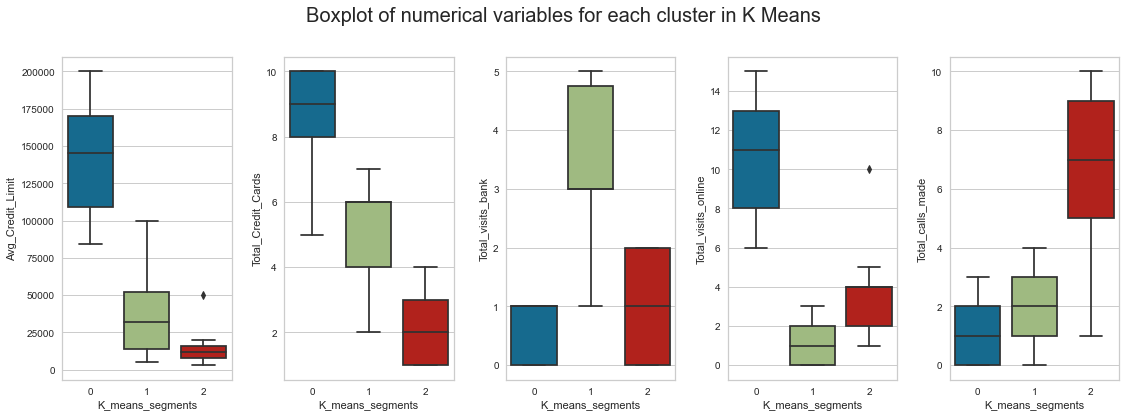

In [433]:
# Box Plot for K Means
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster in K Means', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=bank_data_segments[all_col[counter]],x=bank_data_segments['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

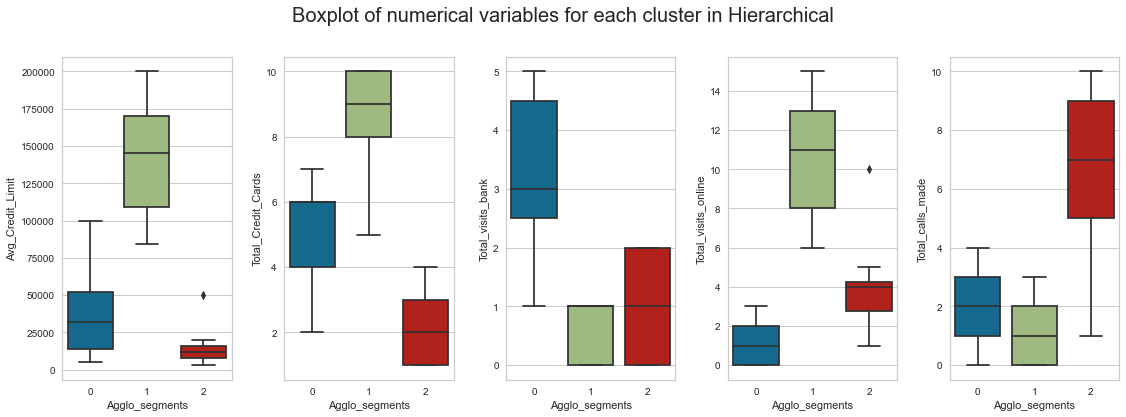

In [434]:
# Box Plot for Agglomerative Clustering
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster in Hierarchical', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=bank_agg_segments[all_col[counter]],x=bank_agg_segments['Agglo_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

- Cluster 0 in KMeans and Cluster 2 in Agglomerative are very similar.
- Cluster 1 in KMeans and Cluster 0 in Agglomerative are very similar.
- Cluster 2 in KMeans and Cluster 1 in Agglomerative are exactly same

**The comparison reveals K Means with 3 clusters and Agglomerative Clustering with 3 clusters and Linkage parameters, eucleadian and average perform similarly and created similar segments**

## Insights and Recommendations:

- Cluster 0 in KMeans (Cluster 2 in Hierarchical) consists of customers with lowest average credit limit, lowest number of credit cards. Medium visits to bank and online and highest number of calls made. Proactively call these customers to solve their problems and can help to keep their business with the bank. Email campaigning can be done too and offer discounts to keep them stay such as 0 APR, low fee/no fee credit cards etc.Around 220 customers, so a good percentage of customers. 

- Cluster 1 in KMeans (Cluster 0 in Hierarchical) consists of customers with an average credit limit in the middle range, upto 100K, also fairly high number of credit cards. Most visits to bank, but lowest visits online and fewer number of calls made. Marketing can be done to these customers while they are visitng the bank to  introduce them to new offers. Steps can be taken proactively to solve their problems for which they are visitng. Online and email marketing may not be effective as they have the least online visits. Most customers are in this segment, around 380.

- Cluster 2 in KMeans (Cluster 1 in Hierarchical) consists of customers with highest average credit limit, highest number of credit cards. Least visits to bank (almost none) as well as calls made, but highest visits online. Marketing can be done to these customers while they are visitng the bank to  introduce them to new offers. Focused marketing campaigns can be done to target customers with higher purchasing power. Offers to keep them happy. There are only 50 such customers. But value of their business can be higher then the majority cluster. So proactively email and do online campaigning to introduce them to new high end offers.